In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Coding Joe

In [2]:
from numpy.random import uniform

In [3]:
joe="susceptable"
roll=np.floor(uniform(0,100))
if roll<10:
    joe="infected"
if joe=="infected":
    for i in range(6):
        print(joe,"day:",i)
    joe="recovered"
print(joe)

susceptable


In [4]:
joe="susceptable"
tries=0
while joe!="recovered":
    joe="susceptable"
    roll=np.floor(uniform(0,100))
    print(joe,roll)
    tries+=1
    if roll<10:
        joe="infected"
    if joe=="infected":
        for i in range(6):
            print(joe,"day:",i)
        joe="recovered"
print(joe,tries)

susceptable 33.0
susceptable 40.0
susceptable 54.0
susceptable 6.0
infected day: 0
infected day: 1
infected day: 2
infected day: 3
infected day: 4
infected day: 5
recovered 4


## Including Jane

In [5]:
joe="susceptable"
jane="susceptable"
days=0
joe_r=0
jane_r=0
tries=1
while (joe!="recovered" or jane!="recovered"):
    days+=1
    if joe=="recovered" and jane=="susceptable":
        joe="susceptable"
        days=1
        tries+=1
        print("============================================")
    if joe=="infected" and days>=joe_r:
        joe="recovered"
    if jane=="infected" and days>=jane_r:
        jane="recovered"

    print("Day is",days,"Joe is",joe)
    print("Day is",days,"Jane is",jane)
    if joe=="susceptable":
        roll=np.floor(uniform(0,100))
        print("joe",joe,roll)
        if roll<10:
            joe="infected"
            joe_r=days+5
            print("joe recovers",joe_r)
    if joe=="infected" and days<joe_r:
        roll=np.floor(uniform(0,100))
        print("jane",jane,roll)
        if roll<10:
            jane="infected"
            jane_r=days+5
            print("jane recovers",jane_r)

print(joe,jane)
print(tries)

Day is 1 Joe is susceptable
Day is 1 Jane is susceptable
joe susceptable 99.0
Day is 2 Joe is susceptable
Day is 2 Jane is susceptable
joe susceptable 25.0
Day is 3 Joe is susceptable
Day is 3 Jane is susceptable
joe susceptable 19.0
Day is 4 Joe is susceptable
Day is 4 Jane is susceptable
joe susceptable 84.0
Day is 5 Joe is susceptable
Day is 5 Jane is susceptable
joe susceptable 89.0
Day is 6 Joe is susceptable
Day is 6 Jane is susceptable
joe susceptable 75.0
Day is 7 Joe is susceptable
Day is 7 Jane is susceptable
joe susceptable 65.0
Day is 8 Joe is susceptable
Day is 8 Jane is susceptable
joe susceptable 63.0
Day is 9 Joe is susceptable
Day is 9 Jane is susceptable
joe susceptable 97.0
Day is 10 Joe is susceptable
Day is 10 Jane is susceptable
joe susceptable 86.0
Day is 11 Joe is susceptable
Day is 11 Jane is susceptable
joe susceptable 62.0
Day is 12 Joe is susceptable
Day is 12 Jane is susceptable
joe susceptable 69.0
Day is 13 Joe is susceptable
Day is 13 Jane is susceptable

# Monte Carlo

In [6]:
from numpy.random import binomial

In [7]:
def sir(u,parms,t):
    bet,gamm,iota,N,dt=parms
    S,I,R,Y=u
    lambd = bet*(I+iota)/N
    ifrac = 1.0 - np.exp(-lambd*dt)
    rfrac = 1.0 - np.exp(-gamm*dt)
    infection = binomial(S,ifrac)
    recovery = binomial(I,rfrac)
    return [S-infection,I+infection-recovery,R+recovery,Y+infection]

def simulate(u,parms,tf,tl):
    t = np.linspace(0,tf,tl)
    parms.append(t[1]-t[0])
    S = np.zeros(tl)
    I = np.zeros(tl)
    R = np.zeros(tl)
    Y = np.zeros(tl)
    S[0],I[0],R[0],Y[0] = u
    for j in range(1,tl):
        u = sir(u,parms,t[j])
        S[j],I[j],R[j],Y[j] = u
    return {'t':t,'S':S,'I':I,'R':R,'Y':Y}

In [8]:
parms = [0.85, 0.06, 0., 1e5]
u0 = [1e5-10,10,0,0]
tf,tl=100,10000

In [9]:
sir_out=pd.DataFrame(simulate(u0,parms,tf,tl))

In [10]:
plt.figure(figsize=(15,10))
plt.plot(sir_out.t,sir_out.S)
plt.plot(sir_out.t,sir_out.I)
plt.plot(sir_out.t,sir_out.R)
plt.plot(sir_out.t,sir_out.Y)
plt.legend(["Susceptible","Infectious","Removed","Infected"])
plt.show()

# Differential equations

$$\frac{dS}{dt}=-\frac{\beta IS}{N}$$

$$\frac{dI}{dt}=\frac{\beta IS}{N}-\gamma I$$

$$\frac{dR}{dt}=\gamma I$$

In [11]:
tf,tl=100,100

In [12]:
t = np.linspace(0,tf,tl)
SIR = np.zeros((tl,3))

In [13]:
dt=t[1]-t[0]
beta=0.85
gamma=0.06
N=1e5
k=10.

In [14]:
SIR0=np.array([N-k,k,0])

In [15]:
from scipy.integrate import solve_ivp

In [16]:
def fun(t,y):
    dSIR=np.zeros_like(y)
    dS=-beta*y[1]*y[0]/N
    dI=beta*y[1]*y[0]/N-gamma*y[1]
    dR=gamma*y[1]
    dSIR[0]=dS
    dSIR[1]=dI
    dSIR[2]=dR
    return dSIR

In [17]:
solve=solve_ivp(fun,(0,tf),SIR0,t_eval=t)

In [18]:
SIR=solve.y.T

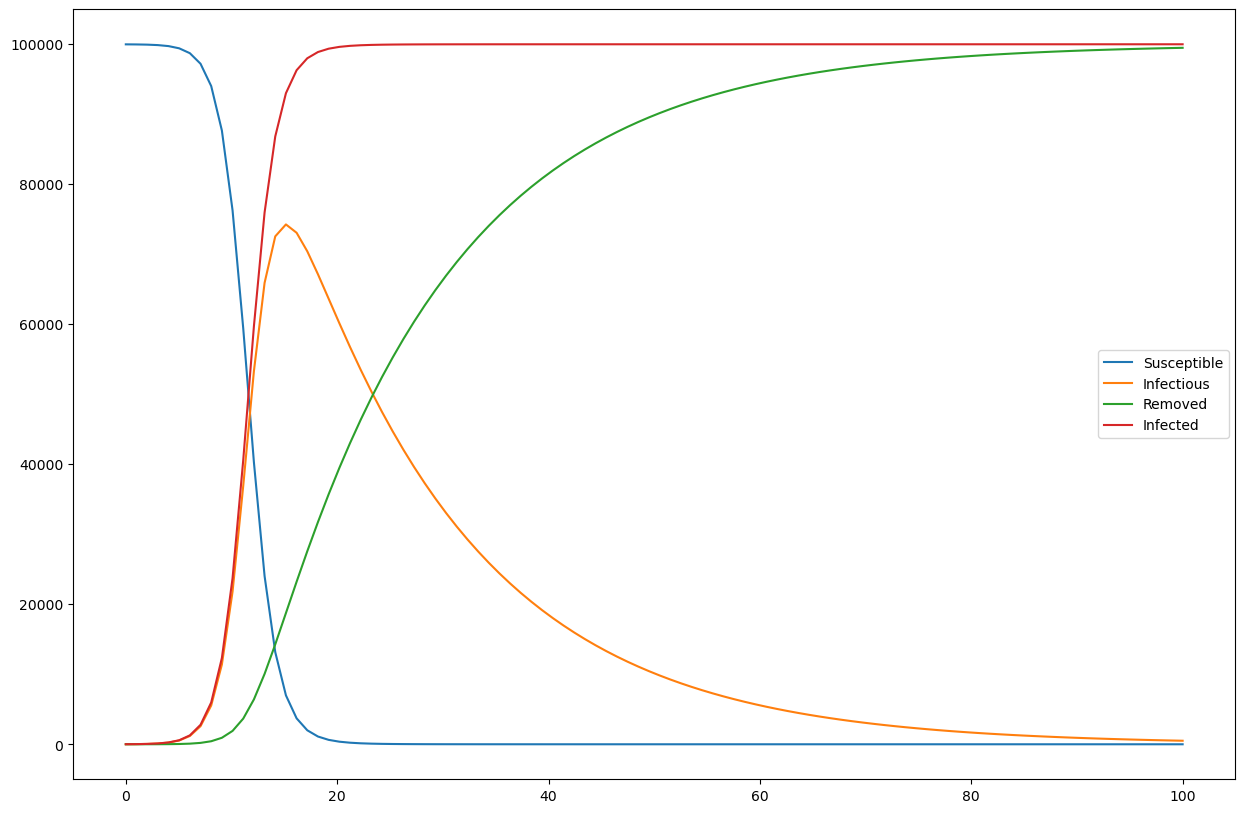

In [19]:
plt.figure(figsize=(15,10))
plt.plot(t,SIR[:,0])
plt.plot(t,SIR[:,1])
plt.plot(t,SIR[:,2])
plt.plot(t,SIR[:,1]+SIR[:,2])
plt.legend(["Susceptible","Infectious","Removed","Infected"])
plt.show()

# Implementing POO for simulating data

In [20]:
import random
import pandas as pd

## With Vaccine and Masks

In [21]:
%run -i vaccineandmask.py

In [22]:
df=start(False)

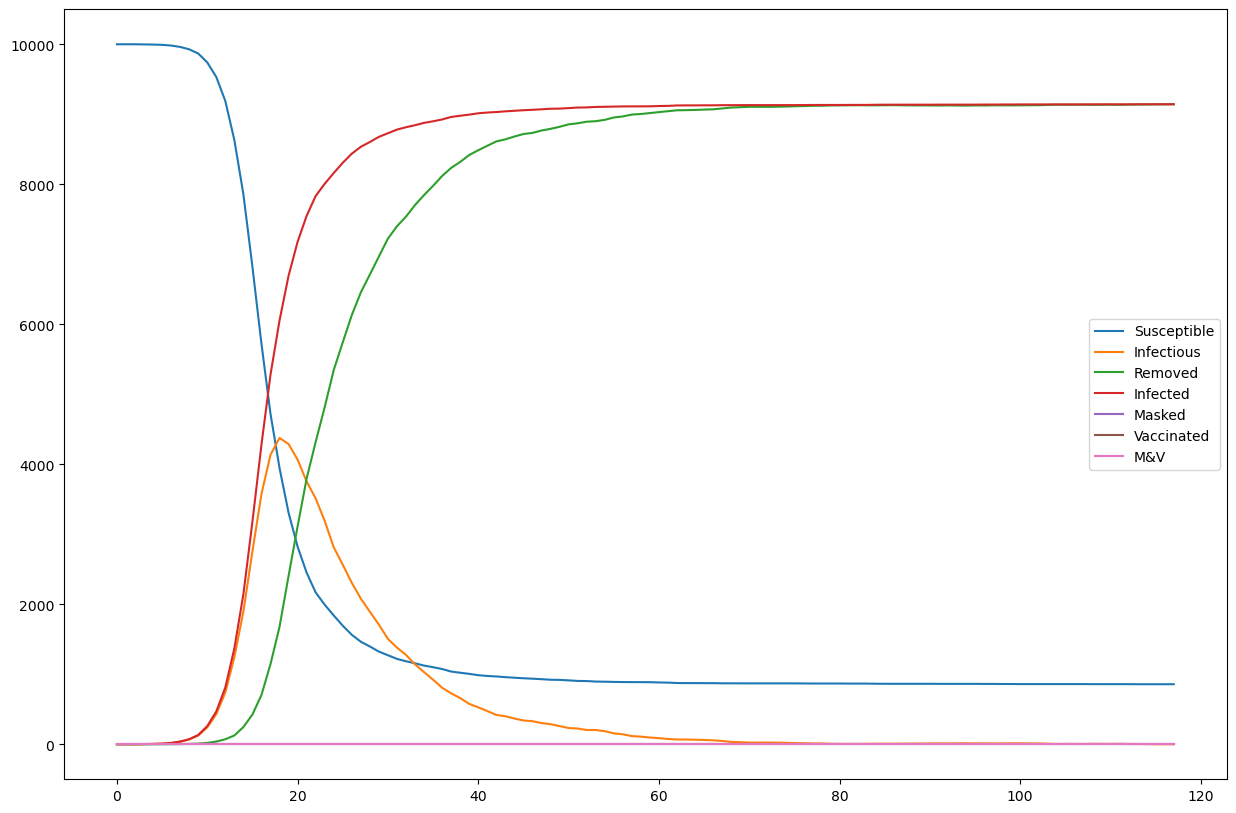

In [23]:
plt.figure(figsize=(15,10))
plt.plot(df.day, df.number_susceptible)
plt.plot(df.day, df.number_sick)
plt.plot(df.day, df.number_recovered)
plt.plot(df.day, df.number_sick+df.number_recovered)
plt.plot(df.day, df.number_masked_sick)
plt.plot(df.day, df.number_vaccinated_sick)
plt.plot(df.day, df.number_maskedccinated_sick)
plt.legend(["Susceptible","Infectious","Removed","Infected","Masked","Vaccinated","M&V"])
# plt.savefig('test.png')
plt.show()

## Including ICU's

In [24]:
%run -i icuanddeath.py

In [25]:
df=start(False)

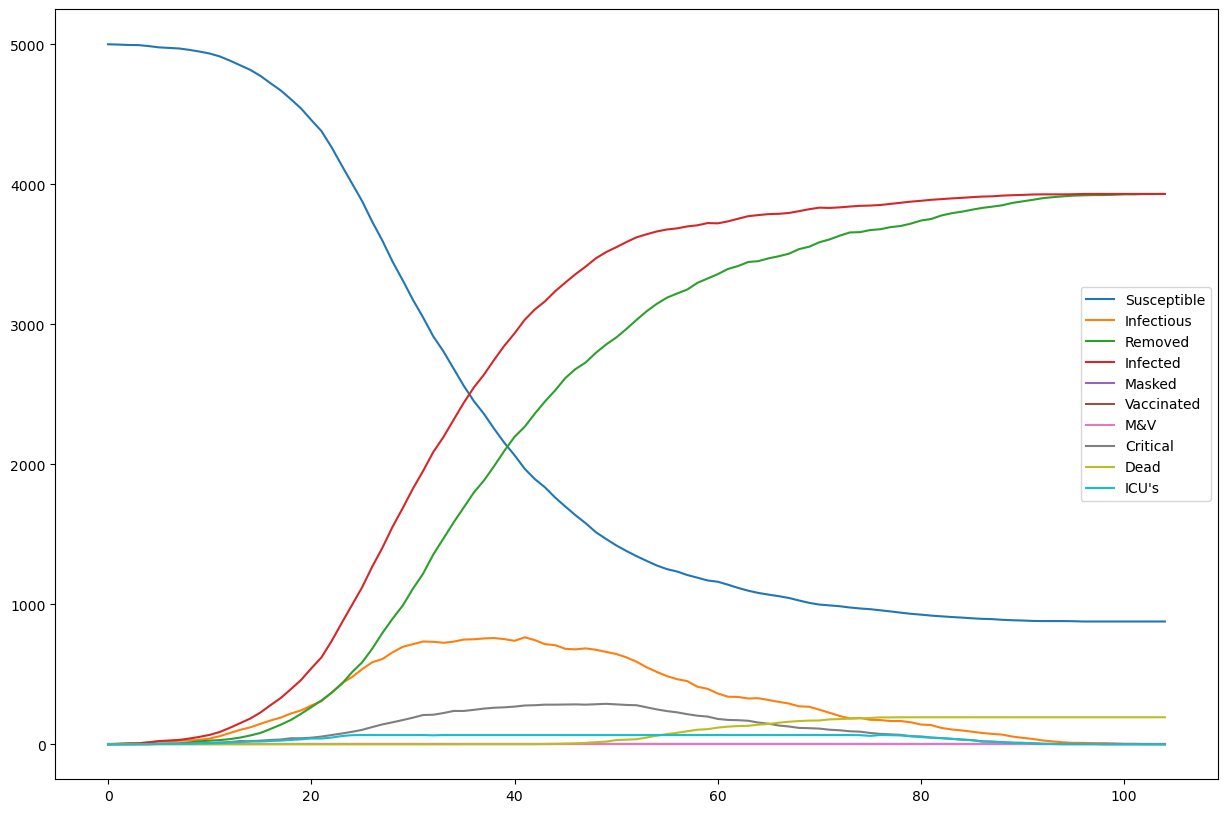

In [26]:
plt.figure(figsize=(15,10))
plt.plot(df.day, df.number_susceptible)
plt.plot(df.day, df.number_sick)
plt.plot(df.day, df.number_recovered)
plt.plot(df.day, df.number_sick+df.number_recovered)
plt.plot(df.day, df.number_masked_sick)
plt.plot(df.day, df.number_vaccinated_sick)
plt.plot(df.day, df.number_maskedccinated_sick)
plt.plot(df.day, df.number_critical)
plt.plot(df.day, df.number_dead)
plt.plot(df.day, df.number_icu)
plt.legend(["Susceptible","Infectious","Removed","Infected","Masked","Vaccinated","M&V","Critical","Dead","ICU's"])
# plt.savefig('test.png')
plt.show()

## Modifying the way masks and vaccines start

In [37]:
%run -i modifiedicumodel.py

In [38]:
df=start(True)

day: 0 Number of sick: 1 Dead: 0 Vaccination: 0 Masked: 0
day: 1 Number of sick: 2 Dead: 0 Vaccination: 0 Masked: 0
day: 2 Number of sick: 3 Dead: 0 Vaccination: 0 Masked: 0
day: 3 Number of sick: 11 Dead: 0 Vaccination: 0 Masked: 0
day: 4 Number of sick: 24 Dead: 0 Vaccination: 0 Masked: 0
day: 5 Number of sick: 35 Dead: 0 Vaccination: 0 Masked: 0
day: 6 Number of sick: 73 Dead: 0 Vaccination: 0 Masked: 0
day: 7 Number of sick: 133 Dead: 0 Vaccination: 0 Masked: 0
day: 8 Number of sick: 243 Dead: 0 Vaccination: 0 Masked: 0
day: 9 Number of sick: 459 Dead: 0 Vaccination: 0 Masked: 0
day: 10 Number of sick: 852 Dead: 0 Vaccination: 0 Masked: 0
day: 11 Number of sick: 1590 Dead: 0 Vaccination: 0 Masked: 0
day: 12 Number of sick: 2854 Dead: 0 Vaccination: 0 Masked: 0
day: 13 Number of sick: 5064 Dead: 0 Vaccination: 0 Masked: 32000
day: 14 Number of sick: 6987 Dead: 0 Vaccination: 0 Masked: 32000
day: 15 Number of sick: 9322 Dead: 0 Vaccination: 0 Masked: 32000
day: 16 Number of sick: 116

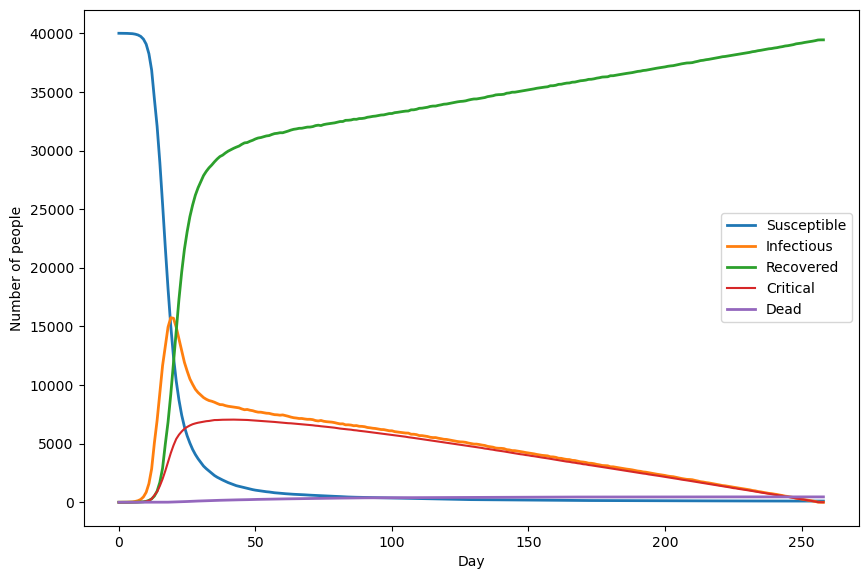

In [39]:
plt.figure(figsize=(10,6.7))
plt.plot(df.day, df.number_susceptible,lw=2)
plt.plot(df.day, df.number_sick,lw=2)
plt.plot(df.day, df.number_recovered,lw=2)
# plt.plot(df.day, df.number_sick+df.number_recovered)
# plt.plot(df.day, df.number_masked_sick)
# plt.plot(df.day, df.number_vaccinated_sick)
# plt.plot(df.day, df.number_maskedccinated_sick)
plt.plot(df.day, df.number_critical)
plt.plot(df.day, df.number_dead,lw=2)
# plt.plot(df.day, df.number_icu)
plt.xlabel("Day")
plt.ylabel("Number of people")
plt.legend(["Susceptible","Infectious","Recovered","Critical","Dead"])
# plt.savefig('test.png')
plt.show()

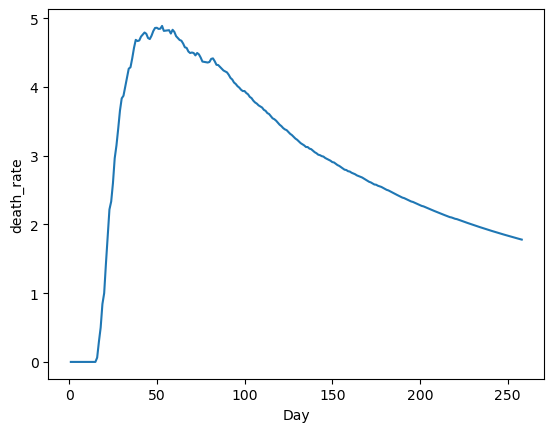

In [40]:
plt.plot(df.number_dead/df.day)
plt.xlabel("Day")
plt.ylabel("death_rate")
plt.show()

In [41]:
(df.number_dead/df.day).mean()

2.931559982547939

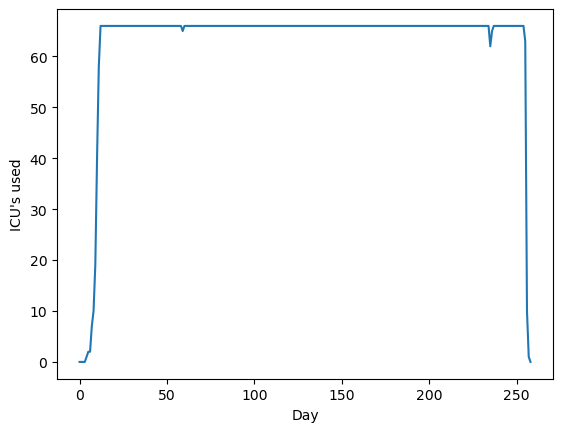

In [42]:
plt.plot(df.day, df.number_icu)
plt.xlabel("Day")
plt.ylabel("ICU's used")
plt.show()